In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


importing data

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")

In [4]:
crop.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [5]:
crop.shape


(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()

0

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop1 = crop.columns[:-1]
crop1

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

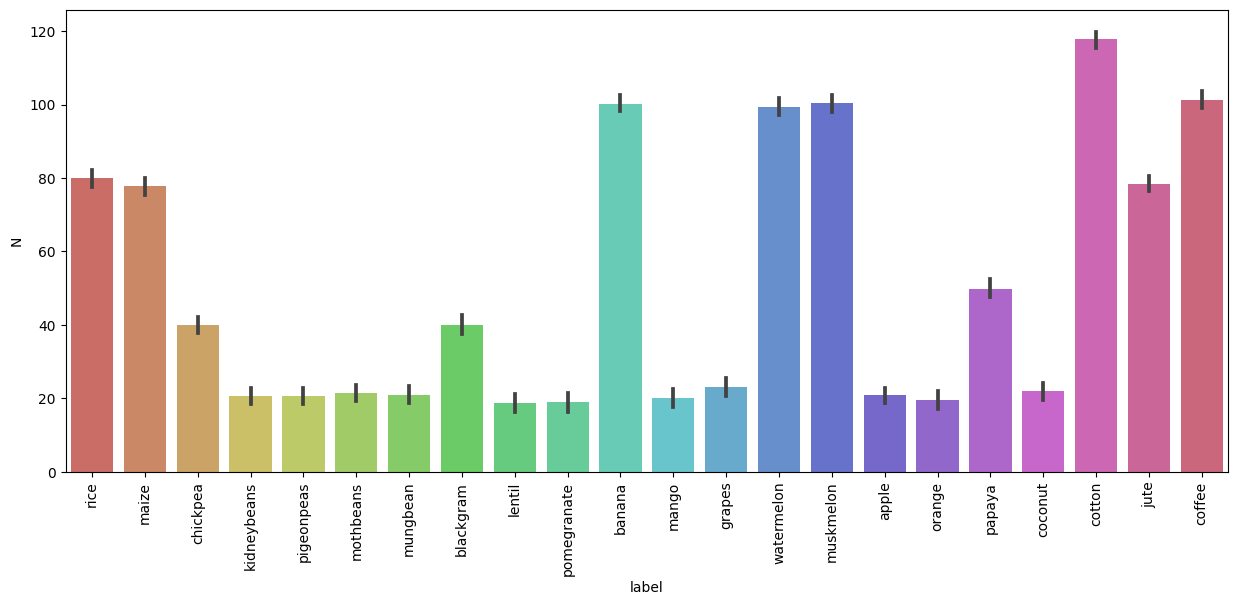

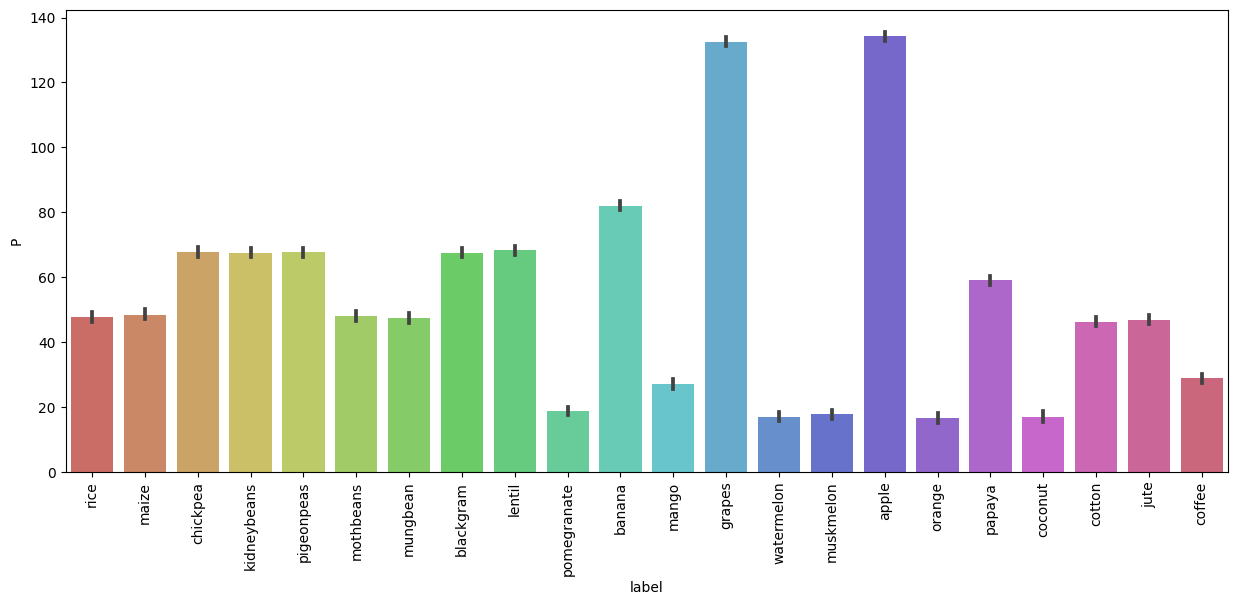

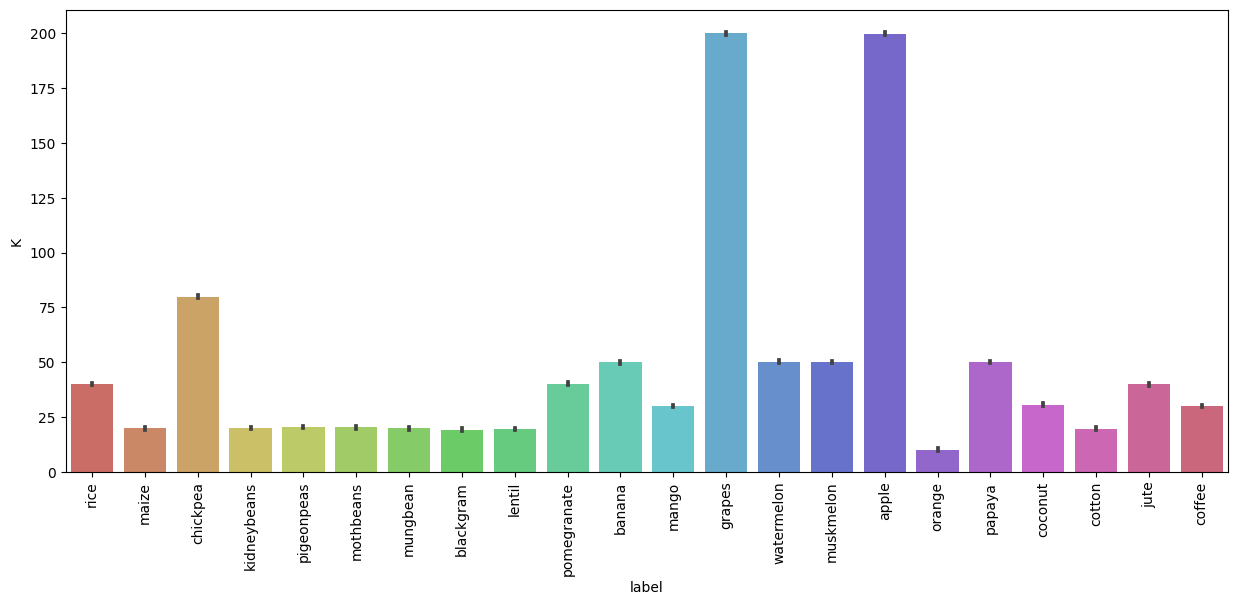

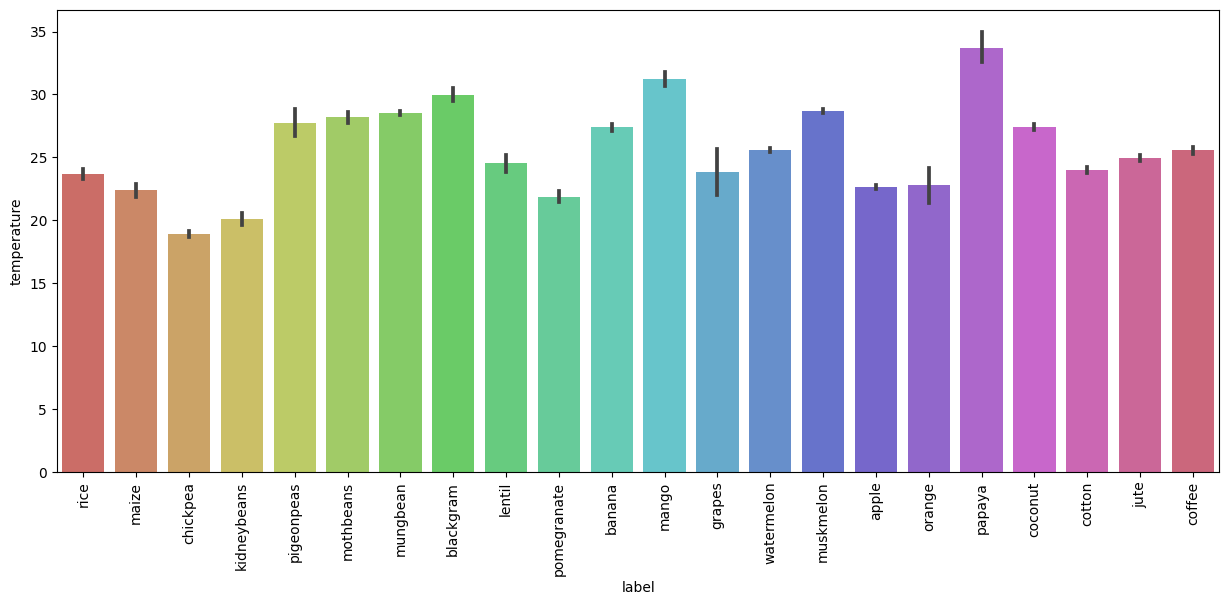

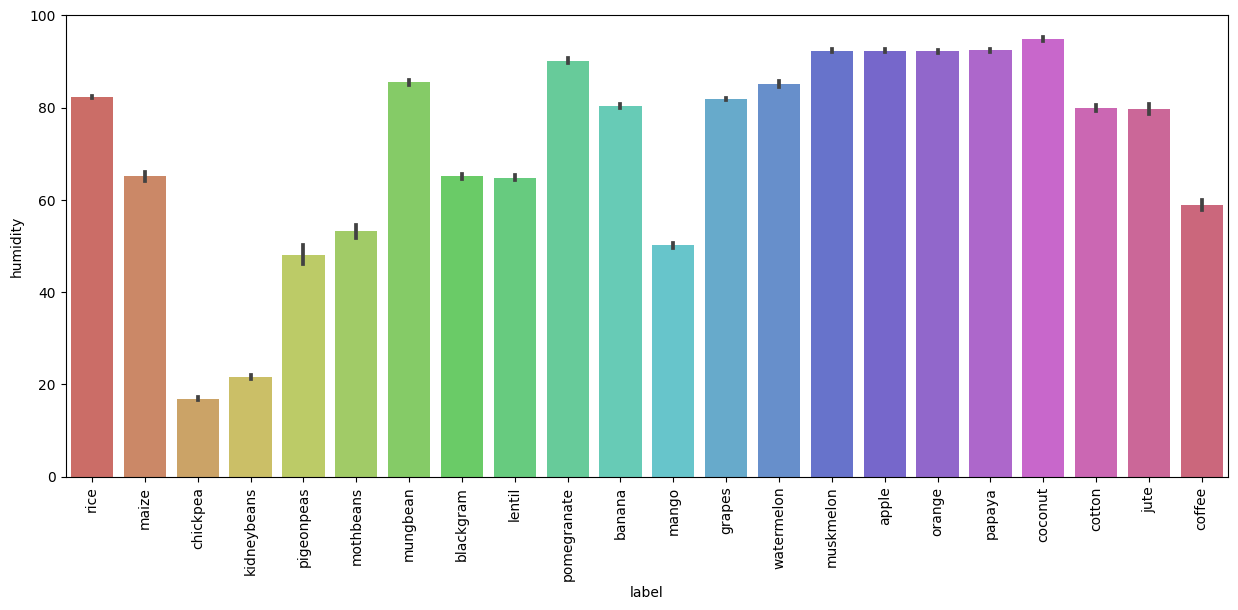

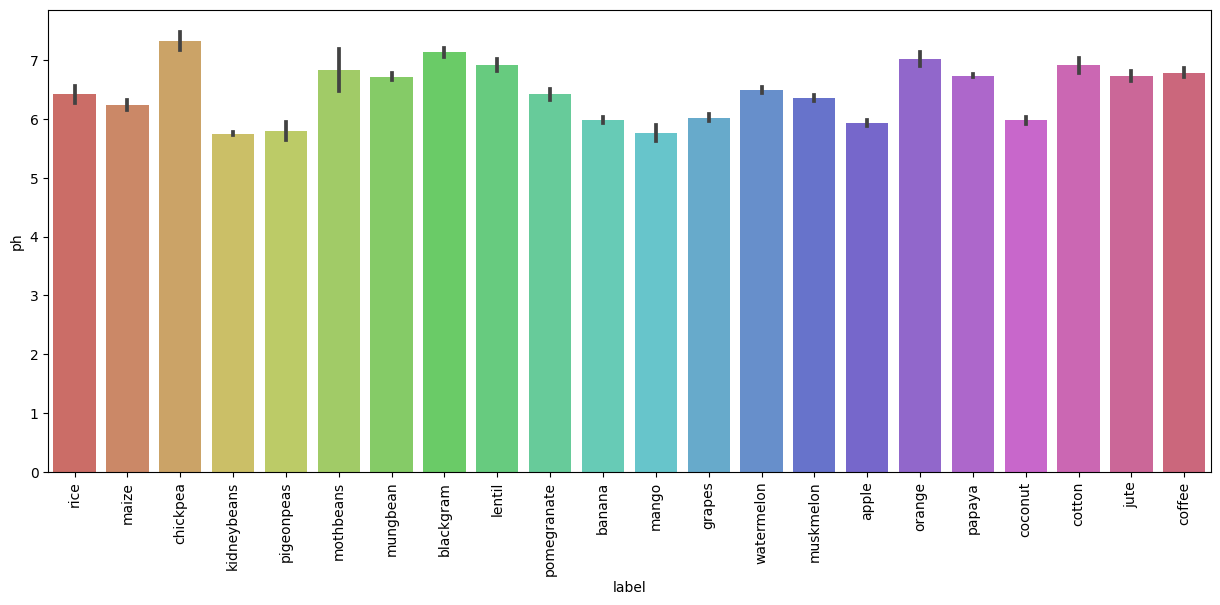

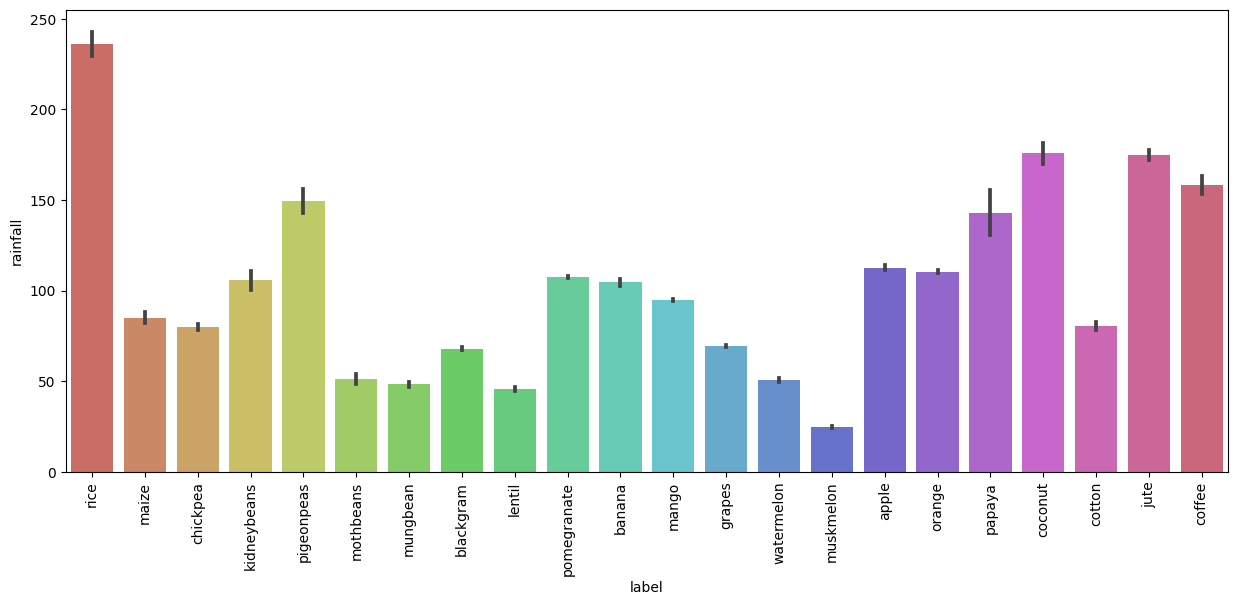

In [12]:
for i in crop1:
    plt.figure(figsize=(15,6))
    sns.barplot(y = i, x = 'label', data=crop, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [11]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

encoding

In [15]:
# crop_dict = {
#     'rice': 1,
#     'maize': 2,
#     'jute': 3,
#     'cotton': 4,
#     'coconut': 5,  
#     'papaya': 6,  
# 'orange': 7,     
# 'apple': 8,     
# 'muskmelon': 9, 
# 'watermelon': 10,
# 'grapes': 11,    
# 'mango': 12,     
# 'banana': 13,    
# 'pomegranate': 14,
# 'lentil': 15,    
# 'blackgram': 16, 
# 'mungbean': 17,  
# 'mothbeans': 18, 
# 'pigeonpeas': 19,
# 'kidneybeans': 20,
# 'chickpea': 21,  
# 'coffee': 22
    
# }
# crop['crop_num']=crop['label'].map(crop_dict)
from sklearn import preprocessing
label_name = crop.label.unique()
y_label = pd.DataFrame(label_name, columns = ['crop_name'])
label_encoder = preprocessing.LabelEncoder()
y_label['Crop_number'] = label_encoder.fit_transform(y_label['crop_name'])
y_label

,crop_name,Crop_number
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
crop['y']= label_encoder.fit_transform(crop['label'])
crop['y'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [18]:
#crop.drop('label', axis=1,inplace=True)
crop

,N,P,K,temperature,humidity,ph,rainfall,label,y
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


separate the dependent and independent variable

In [19]:

X = crop.iloc[:,0:-2]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [21]:
y = crop.iloc[:, -1]
y.head()

0    20
1    20
2    20
3    20
4    20
Name: y, dtype: int32

In [22]:
#split the datasets:

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1760, 7)
Shape of the y Train : (1760,)
Shape of the X val : (220, 7)
Shape of the y val : (220,)
Shape of the X test : (220, 7)
Shape of the y test : (220,)


In [26]:
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
99,65,37,40,23.359054,83.595123,5.333323,188.413665
1337,117,27,48,26.532593,82.390540,6.835268,54.306608
316,22,79,17,21.424511,20.396597,5.912290,116.520692
985,39,25,36,18.902230,94.998975,5.567805,107.610321
471,5,77,19,31.085650,66.688330,6.242052,175.930327


In [27]:
y_test.head()

99      20
1337    21
316      9
985     19
471     18
Name: y, dtype: int32

In [28]:
#model training
#random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
model = RF.fit(X_train , y_train)

Check the accuracy of the model


In [30]:
model.score(X_val, y_val)

0.990909090909091

In [31]:
#save the model into pkl file

In [32]:
import pickle as pkl

with open('Crop_recommendation_RF.pkl' , 'wb') as f:
    pkl.dump(model,f)

In [34]:
#predict
model.predict(X_val)

array([ 1,  9, 20,  0,  2, 18, 10, 17,  6, 15,  2,  0,  1, 10,  4,  3,  5,
        8,  2,  7,  2, 15,  2,  6,  8, 14,  3,  3, 12, 13,  3,  4,  4,  9,
       17,  4,  6,  8, 13,  0,  4, 13, 14, 12, 13, 20, 18,  0,  6, 15,  3,
       18, 17,  9, 12, 11, 12,  1,  0,  3, 15, 14,  8, 18, 15, 12, 13,  1,
        8, 19,  2, 18,  7, 14, 14,  0, 12, 13,  5,  5,  6,  0, 21, 12, 14,
       14, 12,  0, 17,  0,  5,  4,  4,  3, 17,  3,  2,  2,  0, 20,  4,  4,
        8, 13,  7,  0, 16, 17,  0, 12, 16, 16,  1,  1, 10, 16,  1, 14,  2,
       17, 21,  4, 18, 17,  7, 19,  9,  8,  4,  8,  4,  1,  3, 18, 19,  6,
       16,  1,  3,  8,  8,  7,  0, 11, 17, 17, 19,  8,  9, 14, 21, 13, 11,
        5, 19,  8,  0,  6, 13, 19,  7, 18,  3, 17,  8,  9,  2,  2,  8,  7,
       17, 21,  4, 17,  4,  9, 11,  5,  6,  2,  4, 17, 20,  9,  7,  1, 15,
        5,  6, 18, 17, 19,  3, 11, 14, 10,  3, 13,  5,  3,  0, 13,  1, 10,
       20, 10,  5, 13, 14,  0,  7, 18,  5,  4,  4, 21, 19,  1, 20, 16])

In [35]:
#concatinate X_test and y_test for testing purpose
crop_test = pd.concat([X_test, y_test], axis = 1)
crop_test

,N,P,K,temperature,humidity,ph,rainfall,y
99,65,37,40,23.359054,83.595123,5.333323,188.413665,20
1337,117,27,48,26.532593,82.390540,6.835268,54.306608,21
316,22,79,17,21.424511,20.396597,5.912290,116.520692,9
985,39,25,36,18.902230,94.998975,5.567805,107.610321,19
471,5,77,19,31.085650,66.688330,6.242052,175.930327,18
...,...,...,...,...,...,...,...,...
1708,38,68,54,29.337105,90.817814,6.739170,202.057275,17
275,27,79,82,17.065793,17.540241,6.307005,70.871506,3
1868,8,26,26,25.547599,91.641948,5.702485,212.867626,4
721,25,71,24,28.495387,60.448484,7.187722,74.915595,2


In [36]:
#convert to csv file

crop_test.to_csv('crop_recommendation_test.csv')
y_label.to_csv('label_name_number.csv')